Equally Sized Quartile Thresholds: [ 0.  5. 12. 79.]


C:\Users\rosbach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rosbach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\rosbach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rosbach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2k

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: EstAI2PredAI
No. Observations: 216     Method:             REML        
No. Groups:       28      Scale:              137.6483    
Min. group size:  4       Log-Likelihood:     -850.5535   
Max. group size:  12      Converged:          No          
Mean group size:  7.7                                     
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       -0.788    1.273 -0.619 0.536 -3.282  1.707
PredAI2EstB      0.612    0.032 19.129 0.000  0.550  0.675
Group Var       24.024    1.415                           



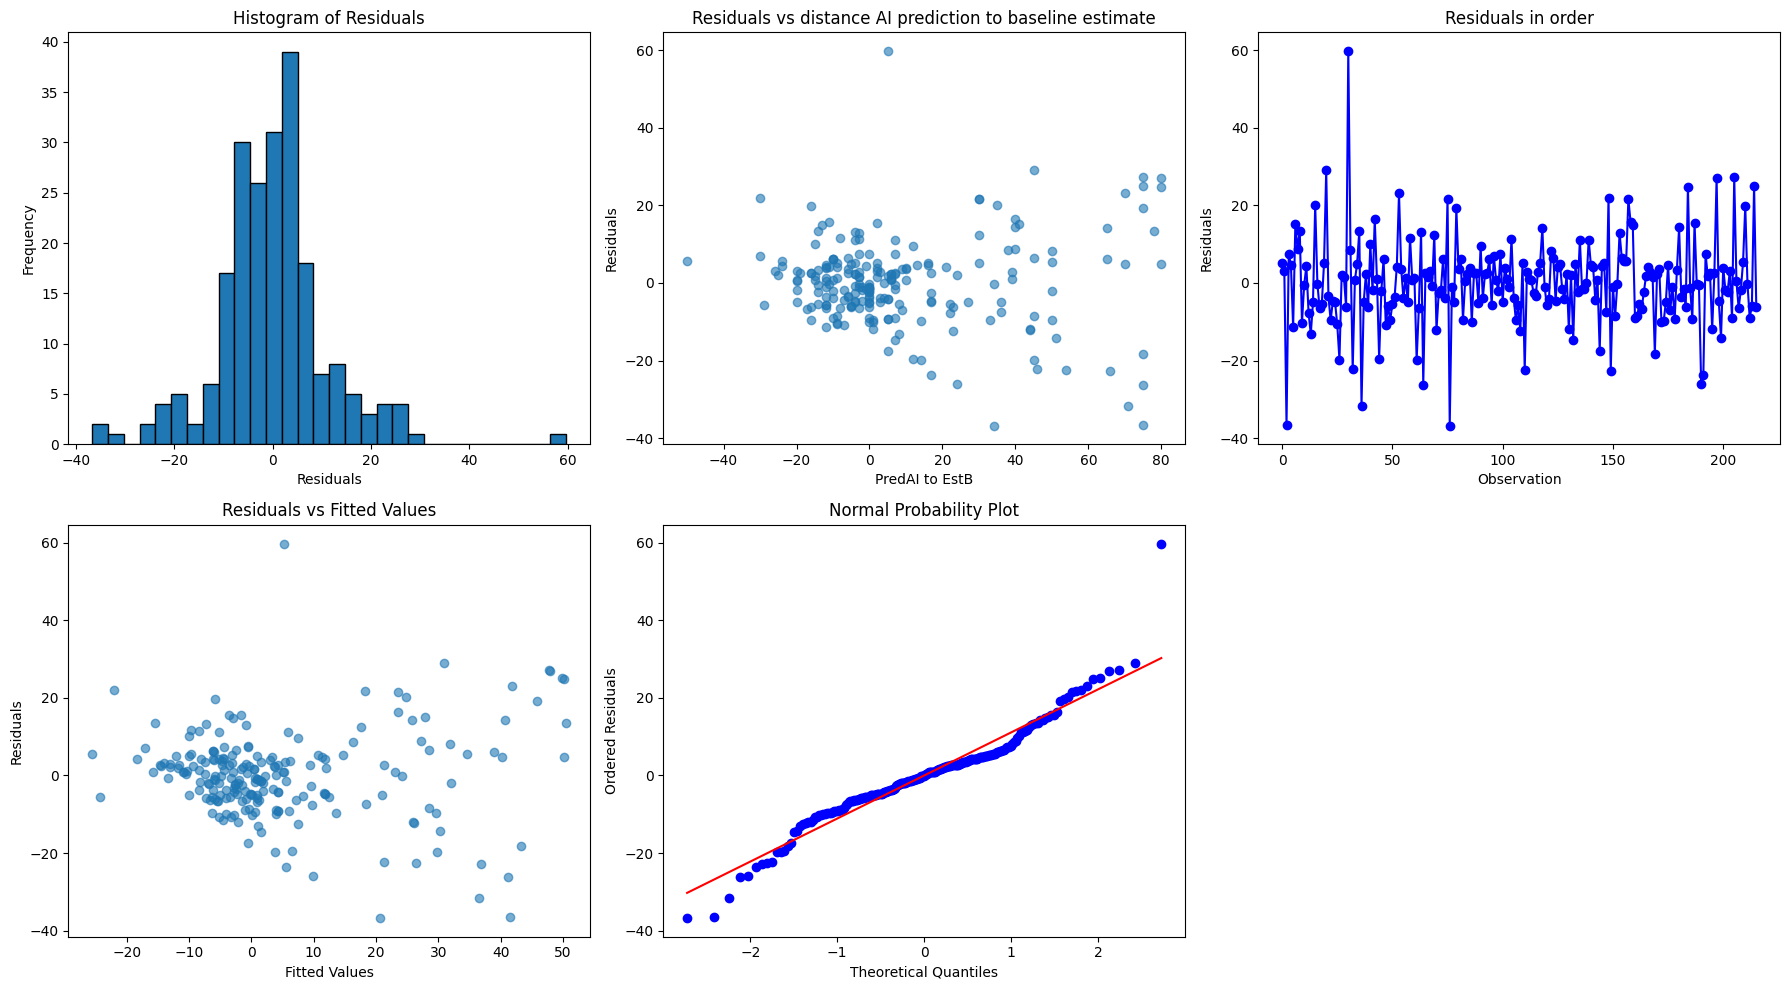

Equally Sized Quartile Thresholds: [ 0.  5. 12. 79.]
15.0
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: EstAI    
No. Observations: 78      Method:             REML     
No. Groups:       26      Scale:              96.3696  
Min. group size:  1       Log-Likelihood:     -289.6463
Max. group size:  6       Converged:          Yes      
Mean group size:  3.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  5.960     3.244  1.838  0.066  -0.397  12.317
EstB       0.251     0.149  1.686  0.092  -0.041   0.543
PredAI     0.602     0.168  3.586  0.000   0.273   0.932
Group Var  1.707     1.322                              



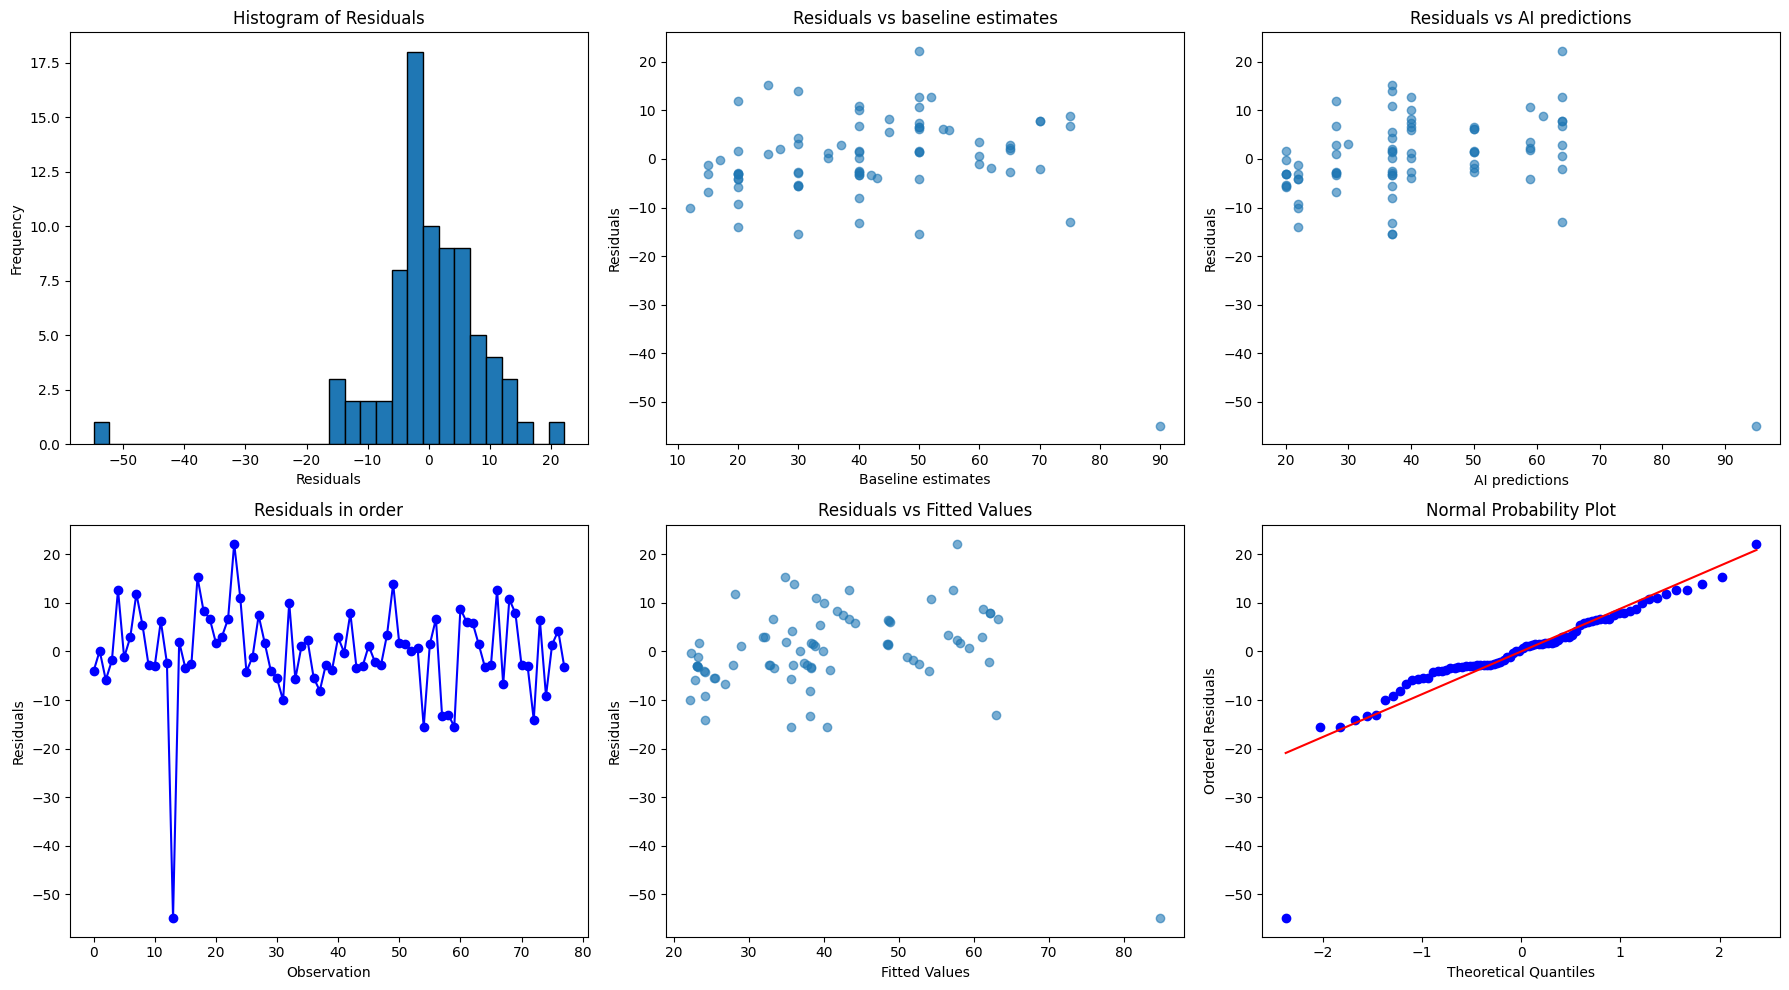

Equally Sized Quartile Thresholds: [ 0.  5. 12. 79.]


C:\Users\rosbach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rosbach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\rosbach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rosbach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2k

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: EstAI2PredAI
No. Observations: 185     Method:             REML        
No. Groups:       28      Scale:              208.8810    
Min. group size:  4       Log-Likelihood:     -761.0220   
Max. group size:  11      Converged:          No          
Mean group size:  6.6                                     
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        0.306    1.278  0.239 0.811 -2.200  2.811
PredAI2EstB      0.491    0.035 14.149 0.000  0.423  0.558
Group Var       10.820    1.135                           



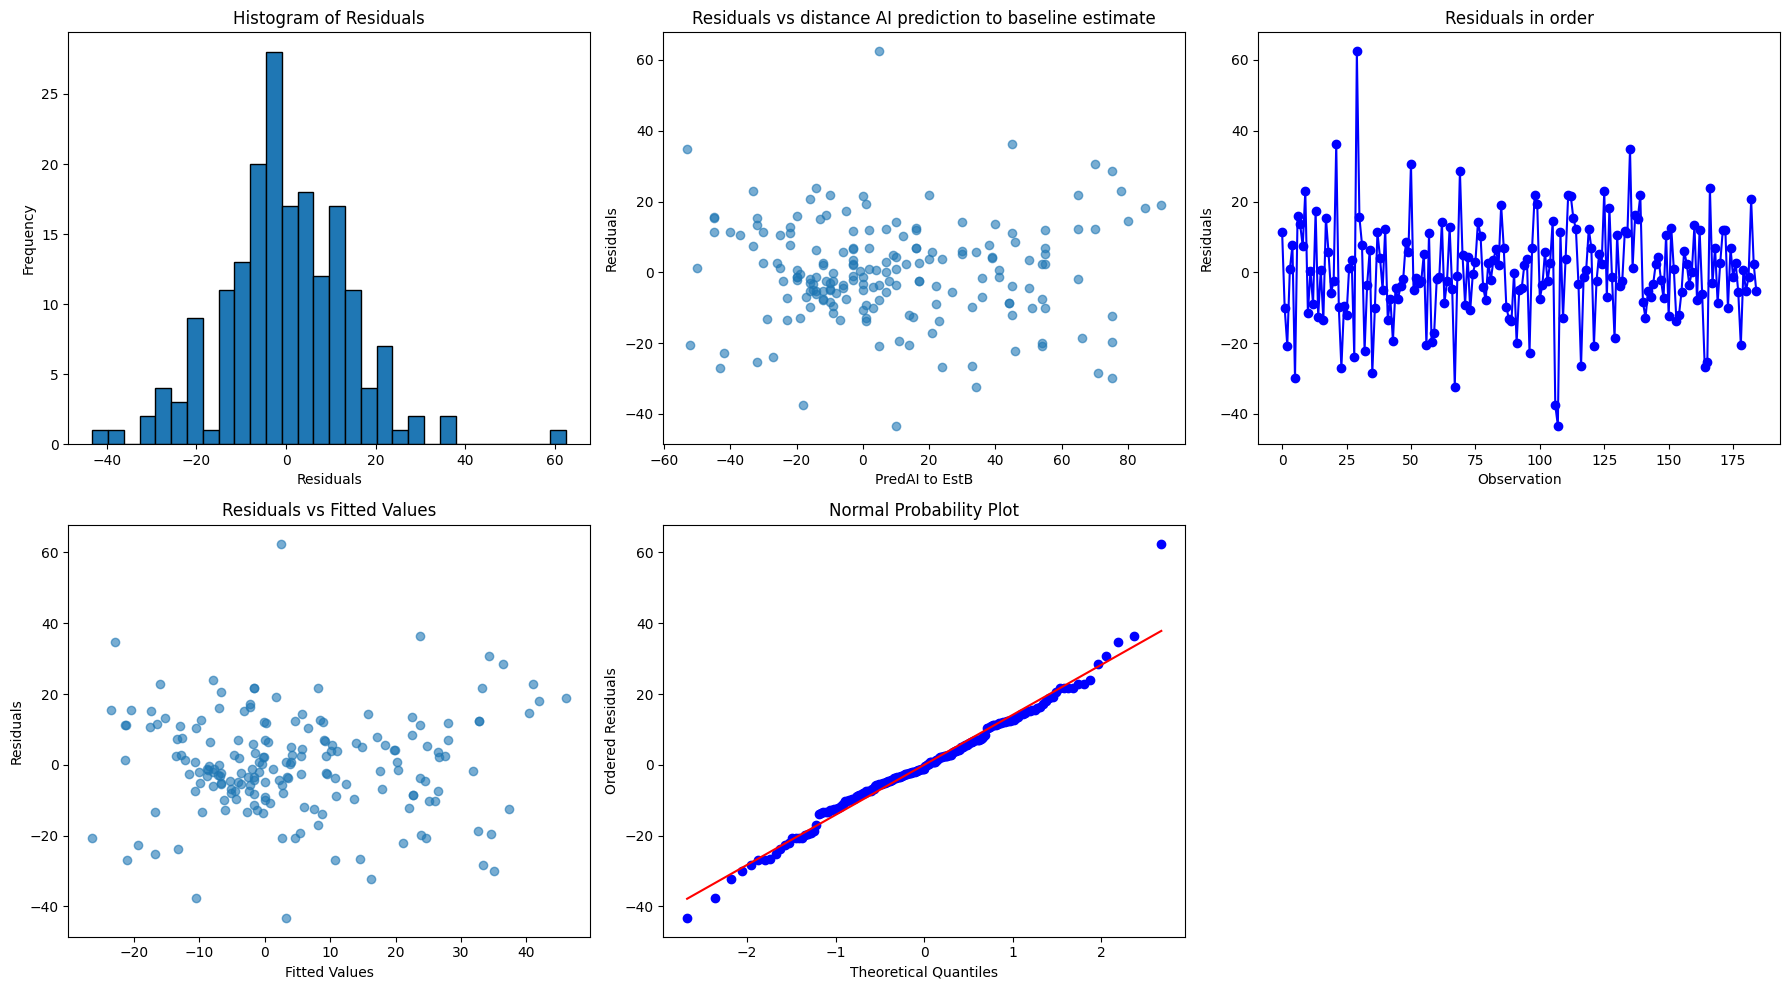

In [4]:
import xlsxwriter
import os
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

def model1 ():
    #Model1-1.2
    #read data from excel sheet
    df=pd.read_excel('./data.xlsx')
    #filter samples
    df['Equally_Sized_Quartile'], equally_sized_bins = pd.qcut(df['ABS_EstAI2GT'], q=3, labels=["Q1", "Q2", "Q3"], retbins=True)
    print("Equally Sized Quartile Thresholds:", equally_sized_bins)
    #Result: Q1=correct 0-5%, Q2=minor error 6-12%, Q3=severe error 13-79% -> Q2 & Q3 = incorrect
    #distance from AI-assisted estimation to GT has to exceed 5% (incorrect assessment Q2 & Q3) to indicate a notable bias
    df = df[df.EstAI2GT.abs()>5]
    #distances from EstB2GT, PredAI2GT, EstAI2GT all must have the same sign to suggest a consistent tendency for over-/ underestimation between human and machine
    df = df[(df.PredAI2GT * df.EstB2GT)>=0]
    df = df[((df.EstB2GT * df.EstAI2GT)>=0) & ((df.PredAI2GT * df.EstAI2GT)>=0)]
    #presence of time pressure during TCP assessment (consistent across both EstB & EstAI) dummy coded as: 0 = without time pressure, 1 = with time pressure
    #comment this in for Model1.1
    #df = df[df.TP == 0]
    #comment this in for Model1.2
    #df = df[df.TP == 1]
    
    md=smf.mixedlm("EstAI2PredAI ~ PredAI2EstB", df, groups=df["participant_id"])
    result = md.fit()
    print(result.summary())
    residuals = result.resid
    fitted_values = result.fittedvalues
    
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    
    # Histogram of residuals
    axs[0, 0].hist(residuals, bins=30, edgecolor='black')
    axs[0, 0].set_title('Histogram of Residuals')
    axs[0, 0].set_xlabel('Residuals')
    axs[0, 0].set_ylabel('Frequency')
    
    # Plot residuals against explanatory variable (AI2B)
    axs[0, 1].scatter(df['PredAI2EstB'], residuals, alpha=0.6)
    axs[0, 1].set_title('Residuals vs distance AI prediction to baseline estimate')
    axs[0, 1].set_xlabel('PredAI to EstB')
    axs[0, 1].set_ylabel('Residuals')
    
    # Plot residuals in order
    axs[0, 2].plot(range(len(residuals)), residuals, marker='o', linestyle='-', color='blue')
    axs[0, 2].set_title('Residuals in order')
    axs[0, 2].set_xlabel('Observation')
    axs[0, 2].set_ylabel('Residuals')
    
    # Plot residuals against fitted values
    axs[1, 0].scatter(fitted_values, residuals, alpha=0.6)
    axs[1, 0].set_title('Residuals vs Fitted Values')
    axs[1, 0].set_xlabel('Fitted Values')
    axs[1, 0].set_ylabel('Residuals')
    
    # Normal probability plot
    stats.probplot(residuals, dist="norm", plot=axs[1, 1])
    axs[1, 1].set_title('Normal Probability Plot')
    axs[1, 1].set_xlabel('Theoretical Quantiles')
    axs[1, 1].set_ylabel('Ordered Residuals')
    
    # Remove empty subplot
    fig.delaxes(axs[1, 2])
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
def model2to3 ():
    #Model2-3
    #read data from excel sheet
    df=pd.read_excel('./data.xlsx')

    #filter samples
    df['Equally_Sized_Quartile'], equally_sized_bins = pd.qcut(df['ABS_EstAI2GT'], q=3, labels=["Q1", "Q2", "Q3"], retbins=True)
    print("Equally Sized Quartile Thresholds:", equally_sized_bins)
    #Result: Q1=correct 0-5%, Q2=minor error 6-12%, Q3=severe error 13-79% -> Q2 & Q3 = incorrect
    #distances from the baseline and AI-assisted estimate to the GT exceed 5% (incorrect assessment Q2 & Q3), indicating a notable bias/ error
    df = df[(df.ABS_EstB2GT > 5) & (df.ABS_EstAI2GT > 5)]
    
    print(np.median(df["ABS_PredAI2EstB"]))
    
    #Model2
    #for the AI prediction to be considered congruent, its distance from the GT also has to exceed 5%
    df = df[df.ABS_PredAI2GT > 5]
    #distances from EstB2GT, PredAI2GT, EstAI2GT all must have the same sign to suggest a consistent tendency for over-/ underestimation between human and machine
    df = df[(df.PredAI2GT * df.EstB2GT)>0]
    df = df[((df.EstB2GT * df.EstAI2GT)>0) & ((df.PredAI2GT * df.EstAI2GT)>0)]
    #for the AI prediction to be considered congruent, it also has to be close to the baseline estimate
    #here the dataset is split based on the median distance from the AI predictions to the baseline estimates
    df = df[df.PredAI2EstB.abs() <= 15]
    
    #Model3 (Comment out Model 2, before commenting this in)
    #for the AI prediction to be considered incongruent, it has to be further away from the baseline estimate
    #df = df[df.PredAI2EstB.abs() > 15]
    
    # Mixed linear model with two predictors: EstB and PredAI
    md = smf.mixedlm("EstAI ~ EstB + PredAI", df, groups=df["participant_id"])
    result = md.fit()
    print(result.summary())
    residuals = result.resid
    fitted_values = result.fittedvalues

    fig, axs = plt.subplots(2, 3, figsize=(18, 10))

    # Histogram of residuals
    axs[0, 0].hist(residuals, bins=30, edgecolor='black')
    axs[0, 0].set_title('Histogram of Residuals')
    axs[0, 0].set_xlabel('Residuals')
    axs[0, 0].set_ylabel('Frequency')

    # Plot residuals against first explanatory variable (B)
    axs[0, 1].scatter(df['EstB'], residuals, alpha=0.6)
    axs[0, 1].set_title('Residuals vs baseline estimates')
    axs[0, 1].set_xlabel('Baseline estimates')
    axs[0, 1].set_ylabel('Residuals')

    # Plot residuals against second explanatory variable (B2GT)
    axs[0, 2].scatter(df['PredAI'], residuals, alpha=0.6)
    axs[0, 2].set_title('Residuals vs AI predictions')
    axs[0, 2].set_xlabel('AI predictions')
    axs[0, 2].set_ylabel('Residuals')

    # Plot residuals in order
    axs[1, 0].plot(range(len(residuals)), residuals, marker='o', linestyle='-', color='blue')
    axs[1, 0].set_title('Residuals in order')
    axs[1, 0].set_xlabel('Observation')
    axs[1, 0].set_ylabel('Residuals')

    # Plot residuals against fitted values
    axs[1, 1].scatter(fitted_values, residuals, alpha=0.6)
    axs[1, 1].set_title('Residuals vs Fitted Values')
    axs[1, 1].set_xlabel('Fitted Values')
    axs[1, 1].set_ylabel('Residuals')

    # Normal probability plot
    stats.probplot(residuals, dist="norm", plot=axs[1, 2])
    axs[1, 2].set_title('Normal Probability Plot')
    axs[1, 2].set_xlabel('Theoretical Quantiles')
    axs[1, 2].set_ylabel('Ordered Residuals')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

def model4to6 ():
    #Model4-6
    #read data from excel sheet
    df=pd.read_excel('./data.xlsx')
    #split into thirds based on the correctness of the AI-aided estimate
    df['Equally_Sized_Quartile'], equally_sized_bins = pd.qcut(df['ABS_EstAI2GT'], q=3, labels=["Q1", "Q2", "Q3"], retbins=True)
    print("Equally Sized Quartile Thresholds:", equally_sized_bins)
    #Result: Q1=correct 0-5%, Q2=minor error 6-12%, Q3=severe error 13-79% -> Q2 & Q3 = incorrect

    #Comment in for Model4 - correct
    #df = df[(df.EstAI2GT.abs()>=0) & (df.EstAI2GT.abs()<=5)]

    #Comment in for Model5 - minor error
    #df = df[(df.EstAI2GT.abs()>5) & (df.EstAI2GT.abs()<=12)]

     #Comment in for Model6 - severe error
    df = df[(df.EstAI2GT.abs()>12) & (df.EstAI2GT.abs()<=79)]
   
    
    md=smf.mixedlm("EstAI2PredAI ~ PredAI2EstB", df, groups=df["participant_id"])
    result = md.fit()
    print(result.summary())
    residuals = result.resid
    fitted_values = result.fittedvalues
    
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    
    # Histogram of residuals
    axs[0, 0].hist(residuals, bins=30, edgecolor='black')
    axs[0, 0].set_title('Histogram of Residuals')
    axs[0, 0].set_xlabel('Residuals')
    axs[0, 0].set_ylabel('Frequency')
    
    # Plot residuals against explanatory variable (AI2B)
    axs[0, 1].scatter(df['PredAI2EstB'], residuals, alpha=0.6)
    axs[0, 1].set_title('Residuals vs distance AI prediction to baseline estimate')
    axs[0, 1].set_xlabel('PredAI to EstB')
    axs[0, 1].set_ylabel('Residuals')
    
    # Plot residuals in order
    axs[0, 2].plot(range(len(residuals)), residuals, marker='o', linestyle='-', color='blue')
    axs[0, 2].set_title('Residuals in order')
    axs[0, 2].set_xlabel('Observation')
    axs[0, 2].set_ylabel('Residuals')
    
    # Plot residuals against fitted values
    axs[1, 0].scatter(fitted_values, residuals, alpha=0.6)
    axs[1, 0].set_title('Residuals vs Fitted Values')
    axs[1, 0].set_xlabel('Fitted Values')
    axs[1, 0].set_ylabel('Residuals')
    
    # Normal probability plot
    stats.probplot(residuals, dist="norm", plot=axs[1, 1])
    axs[1, 1].set_title('Normal Probability Plot')
    axs[1, 1].set_xlabel('Theoretical Quantiles')
    axs[1, 1].set_ylabel('Ordered Residuals')
    
    # Remove empty subplot
    fig.delaxes(axs[1, 2])
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

model1()
model2to3()
model4to6()